# Filter Design

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## FIR filter design by windowing

In [2]:
wc = 0.3*np.pi  # cut-off frequency
N = 9  # filter order
n = np.array(range(N+1))  # n = [0,1,2,...,N]

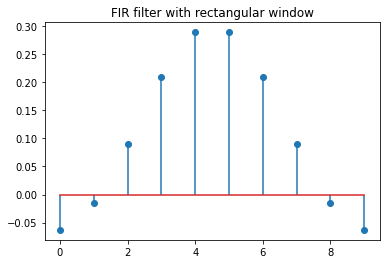

In [3]:
# Rectangular window = ideal filter, shifted to the mid-point N/2, truncated
h1 = (wc/np.pi) * np.sinc((wc/np.pi) * (n - N/2))
plt.stem(h1)
plt.title('FIR filter with rectangular window');

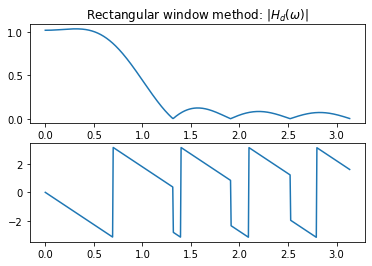

In [4]:
# Compute the frequency response (DTFT) using function signal.freqz
w, H1 = signal.freqz(h1)

plt.subplot(2,1,1)
plt.plot(w, np.abs(H1))
plt.title('Rectangular window method: $|H_{d}(\omega)|$')
plt.subplot(2,1,2)
plt.plot(w, np.angle(H1))

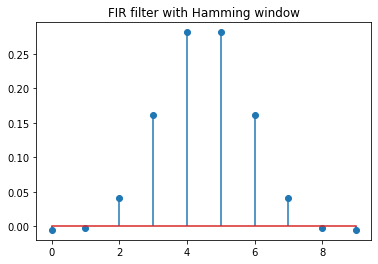

In [5]:
window = np.hamming(N+1)  # Hamming window
h2 = np.multiply(h1, window)  # Apply Hamming window
plt.stem(h2)
plt.title('FIR filter with Hamming window');

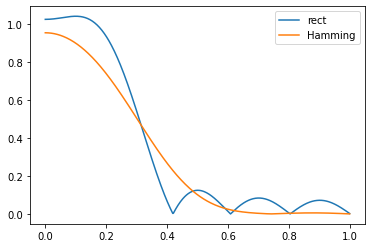

In [6]:
w, H2 = signal.freqz(h2)

plt.plot(w / np.pi, np.abs(H1), w / np.pi, np.abs(H2))
plt.legend(('rect', 'Hamming'));

Note: More general FIR filter design by windowing method is provided by signal.firwin

## Equiripple (minimax optimum) FIR filter design

In [7]:
wp = 0.2
ws = 0.4

h3 = signal.remez(N+1, [0, wp/2, ws/2, 1/2], [1, 0])

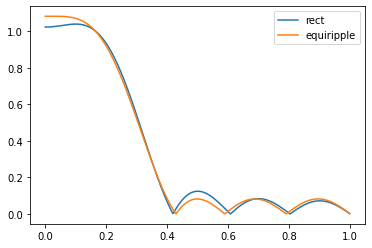

In [8]:
w, H3 = signal.freqz(h3)

plt.plot(w / np.pi, np.abs(H1), w / np.pi, np.abs(H3))
plt.legend(('rect', 'equiripple'));

## IIR filter design

In [9]:
b, a = signal.iirfilter(N, wc/np.pi, btype='lowpass')

print('b = ', b)
print('a = ', a)

b =  [0.00013337 0.00120037 0.00480146 0.01120341 0.01680512 0.01680512
 0.01120341 0.00480146 0.00120037 0.00013337]
a =  [ 1.00000000e+00 -3.58630925e+00  6.55871960e+00 -7.55196763e+00
  5.93632144e+00 -3.26056644e+00  1.24213092e+00 -3.14576886e-01
  4.78558300e-02 -3.32012046e-03]


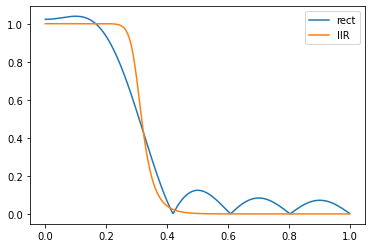

In [10]:
w, H4 = signal.freqz(b, a)

plt.plot(w / np.pi, np.abs(H1), w / np.pi, np.abs(H4))
plt.legend(('rect', 'IIR'));

# Applying the Filter

In [12]:
from scipy.io.wavfile import read
from IPython.display import Audio
fs, x = read('resources/handel.wav')

In [13]:
y = signal.lfilter(b, a, x)

In [14]:
Audio(data=x, rate=fs)

In [15]:
Audio(data=y, rate=fs)

In [ ]:
pri